<a href="https://colab.research.google.com/github/shivanishridhar/Data-Science-Engineering-Methods/blob/main/002770631_Shivani_Gole_Assignment04_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch

In [ ]:
df_play = pd.read_excel("/content/play.xlsx")
df_play.head()

,Outlook,Temperature,Humidity,Windy,Decision
0,overcast,72,90,strong,play
1,overcast,83,78,weak,play
2,overcast,64,65,strong,play
3,overcast,81,75,weak,play
4,sunny,75,70,strong,play


In [ ]:
play = df_play.drop(columns=['Outlook', 'Windy', 'Decision'],axis=1)
play.head()

,Temperature,Humidity
0,72,90
1,83,78
2,64,65
3,81,75
4,75,70


In [ ]:
df_play = pd.get_dummies(df_play, columns=['Outlook', 'Windy', 'Decision'])
df_play.head()

,Temperature,Humidity,Outlook_overcast,Outlook_rain,Outlook_sunny,Windy_strong,Windy_weak,Decision_dont_play,Decision_play
0,72,90,1,0,0,1,0,0,1
1,83,78,1,0,0,0,1,0,1
2,64,65,1,0,0,1,0,0,1
3,81,75,1,0,0,0,1,0,1
4,75,70,0,0,1,1,0,0,1


In [ ]:
def clustering(data, method):
    clusters = sch.linkage(data, method=method, metric="euclidean")
    return clusters

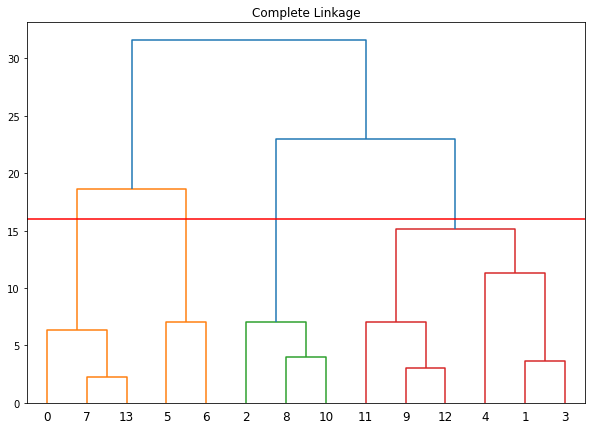

In [ ]:
clusters = clustering(play, 'complete')
plt.figure(figsize=(10,7))
plt.title("Complete Linkage")
sch.dendrogram(Z=clusters)
plt.axhline(y = 16, color = 'r', linestyle = '-')
plt.show()

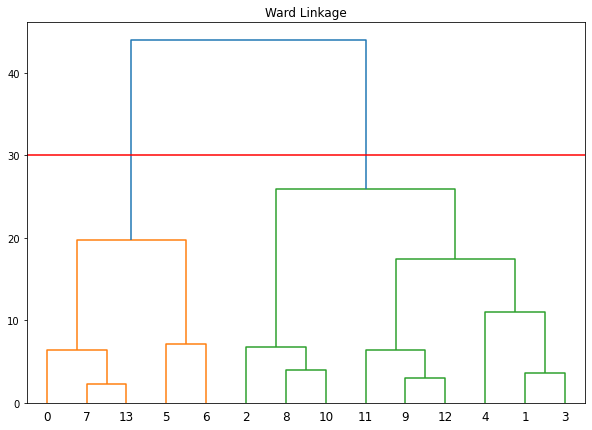

In [ ]:
clusters = clustering(play, 'ward')
plt.figure(figsize=(10,7))
plt.title("Ward Linkage")
sch.dendrogram(Z=clusters)
plt.axhline(y = 30, color = 'r', linestyle = '-')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
clustering_model.fit(play)
clustering_model.labels_

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1])

Text(0.5, 1.0, 'Labeled Play Data')

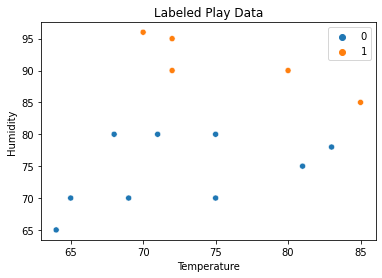

In [ ]:
import seaborn as sns
data_labels = clustering_model.labels_
sns.scatterplot(x='Temperature', 
                y='Humidity', 
                data=play, 
                hue=data_labels).set_title('Labeled Play Data')

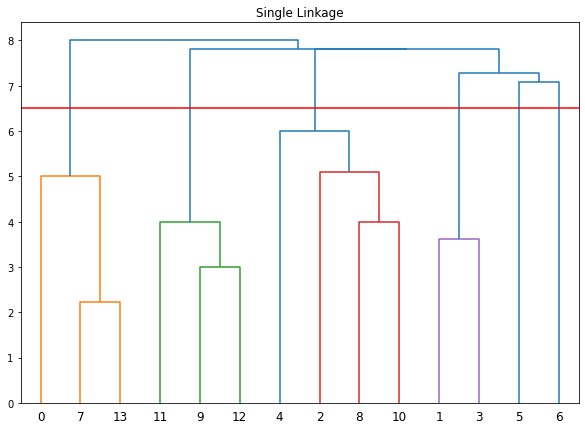

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Single Linkage")
clusters = clustering(play, 'single')
sch.dendrogram(Z=clusters)
plt.axhline(y = 6.5, color = 'r', linestyle = '-')
plt.show()

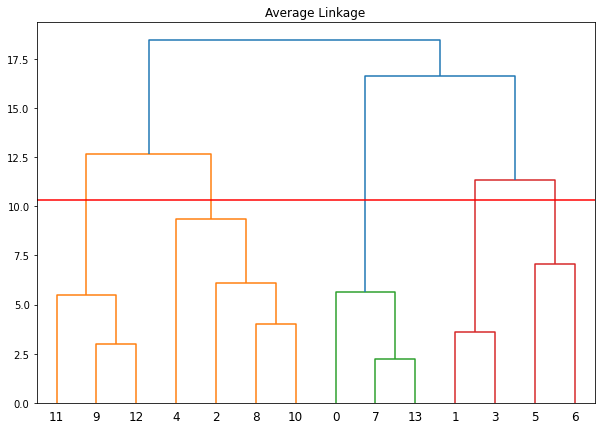

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Average Linkage")
clusters = clustering(play, 'average')
sch.dendrogram(Z=clusters)
plt.axhline(y = 10.3, color = 'r', linestyle = '-')
plt.show()

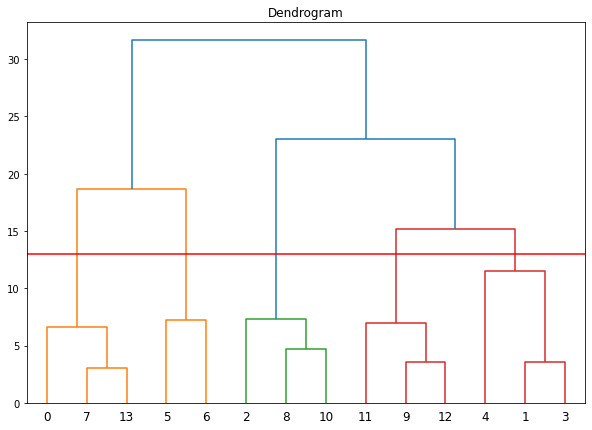

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Dendrogram")
clusters = clustering(df_play, 'complete')
sch.dendrogram(Z=clusters)
plt.axhline(y = 13, color = 'r', linestyle = '-')
plt.show()

In [ ]:
i = np.arange(0,360,5)
theta = i * np.pi / 180
r1 = 5
r2 = 10
np.random.seed(10)
x1 = r1 * np.cos(theta)
y1 = r1 * np.sin(theta) + np.random.normal(0, 0.2, len(x1))
data_tuppels = list(zip(x1, y1))
data_1 = pd.DataFrame(data_tuppels, columns=['xv','yv'])
data_1.head()

,xv,yv
0,5.000000,0.266317
1,4.980973,0.578835
2,4.924039,0.559161
3,4.829629,1.292418
4,4.698463,1.834368
